## Applied Deep Learning - CSE510
# Recommendation Systems 
#### By
### **Mohamed Fazil M S [ubid - mm549]**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline  

## Part I: ML Method for Recommendations on MovieLens 100K dataset

### Importing Datasets and Preprocessing

In [12]:
movies_data = pd.read_csv("ml-latest-small/movies.csv")
movies_data.info()
movies_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


The **movies_data** consist of all the movies listed in this dataset with its title, movieId, genres.

In [13]:
ratings_data = pd.read_csv("ml-latest-small/ratings.csv")
print(ratings_data.info())
print('User Ratings Metrics')
print('--------------------')
print(ratings_data['rating'].describe())
ratings_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None
User Ratings Metrics
--------------------
count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


The **ratings_data** consist of all the 100k ratings given bby different users in this dataset with the attributes userid, movieid, rating and timestamp.

In [6]:
num_users = ratings_data['userId'].nunique()
num_movies = ratings_data['movieId'].nunique() 
print(" Number of Movies =", num_movies)
print(" Number of Users =", num_users)

 Number of Movies = 9724
 Number of Users = 610


In [7]:
ratings_data['rating'].min() 

0.5

In [8]:
ratings_data['rating'].max() 

5.0

In [9]:
movies_data.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [10]:
ratings_data.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [14]:
# Removing Timestamps which is unecessary
ratings_data=ratings_data.drop('timestamp',axis=1)

In [15]:
ratings_data.userId = ratings_data.userId.astype('category').cat.codes.values
ratings_data.movieId = ratings_data.movieId.astype('category').cat.codes.values
# Converting userId and movieId to category datatype and coding the values
ratings_data

,userId,movieId,rating
0,0,0,4.0
1,0,2,4.0
2,0,5,4.0
3,0,43,5.0
4,0,46,5.0
...,...,...,...
100831,609,9416,4.0
100832,609,9443,5.0
100833,609,9444,5.0
100834,609,9445,5.0


### Creating the Piviot Table of userId VS movieId which shows Ratings

In [16]:
util_df = ratings_data.pivot_table(index=['userId'],columns=['movieId'],values='rating')
util_df=util_df.fillna(0) # Fill N/a to 0
util_df

movieId,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
userId,,,,,,,,,,,,,,,,,,,,,
0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
 genres = [ 'NA','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir',
           'Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
print('Total Number of Genres - ',len(genres))

Total Number of Genres -  19


#### Hot Encoding all Genres in Movies Dataframe

In [41]:
genres_cat_list = []
genres_cat_strlist = []
for i in range(movies_data.shape[0]):
    string = movies_data.iloc[i]['genres']
    str_list = string.split('|')
    genres_cat_strlist.append(str_list)
    hot = np.zeros(len(genres)).astype(int).tolist()
    string = movies_data.iloc[0]['genres']
    if(string==''):
        hot[0] = 1
        genres_cat_list.append(hot)
    else:
        for x in range(len(genres)):
            for g in str_list:
                if(genres[x]==g):
                    hot[x]=1
        genres_cat_list.append(hot)
print('Example Hot Encoding Genres')
print('=============================')
for i in range(5):
    print(movies_data.iloc[i]['title'],'-->',genres_cat_list[i])

Example Hot Encoding Genres
Toy Story (1995) --> [0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Jumanji (1995) --> [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Grumpier Old Men (1995) --> [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Waiting to Exhale (1995) --> [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Father of the Bride Part II (1995) --> [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


#### Combining Average Rating of a Movie from all the Users with the Movies Dataset

In [42]:
movie_rating_avg_list = []
number_ratings = []
for mid in range(len(util_df.transpose().index.tolist())):
    s = 0
    n = 0
    for x in util_df.transpose().iloc[mid]:
        s = s + x
        if(x!=0):
            n=n+1
    movie_rating_avg_list.append(s/n)
    number_ratings.append(n)
movies_data_ratings = util_df.transpose()
movies_data_ratings['total_ratings'] = number_ratings
movies_data_ratings['avg_rating'] = movie_rating_avg_list

data = {'title':movies_data['title'],
        'total_ratings':movies_data_ratings['total_ratings'],
        'avg_rating':movies_data_ratings['avg_rating'],
         'genres_cat':genres_cat_strlist}

movies_data_ratings = pd.DataFrame(data) 
movies_data_ratings = movies_data_ratings.dropna()
movies_data_ratings

,title,total_ratings,avg_rating,genres_cat
0,Toy Story (1995),215.0,3.920930,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,Jumanji (1995),110.0,3.431818,"[Adventure, Children, Fantasy]"
2,Grumpier Old Men (1995),52.0,3.259615,"[Comedy, Romance]"
3,Waiting to Exhale (1995),7.0,2.357143,"[Comedy, Drama, Romance]"
4,Father of the Bride Part II (1995),49.0,3.071429,[Comedy]
...,...,...,...,...
9719,Spiral (2018),1.0,4.000000,[Documentary]
9720,Mission: Impossible - Fallout (2018),1.0,3.500000,"[Action, Adventure, Thriller]"
9721,SuperFly (2018),1.0,3.500000,"[Action, Crime, Thriller]"
9722,Iron Soldier (2010),1.0,3.500000,"[Action, Sci-Fi]"


### Using Neares Neighbour Method to fit a Recomendations for a User

The K neared neighbour method is used on the Piviot Matrix to find similar users and their movie preferences and recommend those movie for them using cosine distances.

In [17]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
# Creating a Compressed Squared Matrix of the Piviot Matrix
movie_csr = csr_matrix(util_df.values)
# Using Cosine Distance Function
knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
knn.fit(movie_csr)

NearestNeighbors(algorithm='brute', metric='cosine')

### Recommend a List of Movies for completely new User
#### Methodology -
* Give the new user the **top 10 highly popular and rated movie** from all time to give the user a broad quality options to choose from.
* This will be done by calculating a **Popularity Index** which Number of Ratings to Average Rating product

In [129]:
# create dataframe to measure Number of ratings to Average Ratings Ratio
movies_data_ratings['popularity'] = movies_data_ratings['total_ratings']*movies_data_ratings['avg_rating']
movies_data_popularity = movies_data_ratings.set_index('title')
movies_data_popularity = movies_data_popularity.sort_values(by=['popularity'],ascending=False)
print('Top 10 Recommended Movies by Popularity Index')
print('==============================================')
movies_data_popularity.head(10)

Top 10 Recommended Movies by Popularity Index


,total_ratings,avg_rating,genres_cat,popularity
title,,,,
"Shawshank Redemption, The (1994)",317.0,4.429022,"[Crime, Drama]",1404.0
Forrest Gump (1994),329.0,4.164134,"[Comedy, Drama, Romance, War]",1370.0
Pulp Fiction (1994),307.0,4.197068,"[Comedy, Crime, Drama, Thriller]",1288.5
"Walk on the Moon, A (1999)",278.0,4.192446,"[Drama, Romance]",1165.5
"Silence of the Lambs, The (1991)",279.0,4.161290,"[Crime, Horror, Thriller]",1161.0
Star Wars: Episode IV - A New Hope (1977),251.0,4.231076,"[Action, Adventure, Sci-Fi]",1062.0
Braveheart (1995),237.0,4.031646,"[Action, Drama, War]",955.5
Home Alone 2: Lost in New York (1992),218.0,4.272936,"[Children, Comedy]",931.5
Schindler's List (1993),220.0,4.225000,"[Drama, War]",929.5


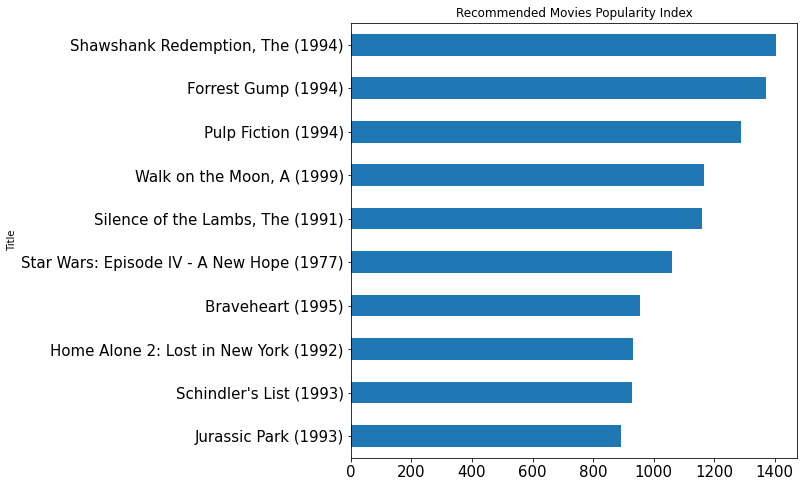

In [141]:
df = movies_data_popularity.head(10)
df = df.sort_values(by=['popularity'])
df = df['popularity']
ax = df.plot.barh(x='popularity',figsize =(8,8),fontsize=15, ylabel = 'Popularity Index',xlabel='Title',title = 'Recommended Movies Popularity Index')

### Recommendations for an Existing User
Using the K Nearest Neibhour Method similar user profiles are clustered and their prefered movies are recommended.

In [142]:
def get_recommendations_knn(userId):
    user_index = userId
    num_recommendations = 10
    distances, movie_indices = knn.kneighbors(util_df.iloc[user_index,:].values.reshape(1, -1), n_neighbors = num_recommendations)
    movie_list_indices = movie_indices.tolist()[0]
    print('Top {} Movie Recommendation for User {}'.format(num_recommendations,userId))
    print('==========================================')
    i=0
    mv_title_list = []
    for mId in list(movie_list_indices):
        i=i+1
        mv = movies_data.loc[movies_data['movieId']== mId]
        mv_title_list.append(mv['title'].values[0])
        print('Movie {} : {} from genres {}'.format(i,mv['title'].values,mv['genres'].values))
        
    similarity_level = []
    for d in distances[0].tolist():
        similarity_level.append(1-d)
    data = {'title':mv_title_list,'recommendation':similarity_level}
    
    df = pd.DataFrame(data)
    df = df.set_index('title')
    df = df.sort_values(by=['recommendation'])
    df = df['recommendation']
    ax = df.plot.barh(x='recommendation',figsize =(8,8),fontsize=15, ylabel = 'Popularity Index',xlabel='Title',title = 'Recommended Movies level')

Top 10 Movie Recommendation for User 600
Movie 1 : ['Love and a .45 (1994)'] from genres ['Action|Comedy|Crime']
Movie 2 : ['Hoop Dreams (1994)'] from genres ['Documentary']
Movie 3 : ['Princess Caraboo (1994)'] from genres ['Drama']
Movie 4 : ['Speed (1994)'] from genres ['Action|Romance|Thriller']
Movie 5 : ['Eat Drink Man Woman (Yin shi nan nu) (1994)'] from genres ['Comedy|Drama|Romance']
Movie 6 : ['Prophecy, The (1995)'] from genres ['Fantasy|Horror|Mystery']
Movie 7 : ['Up Close and Personal (1996)'] from genres ['Drama|Romance']
Movie 8 : ['Clean Slate (1994)'] from genres ['Comedy']
Movie 9 : ['Powder (1995)'] from genres ['Drama|Sci-Fi']
Movie 10 : ['Life with Mikey (1993)'] from genres ['Comedy']


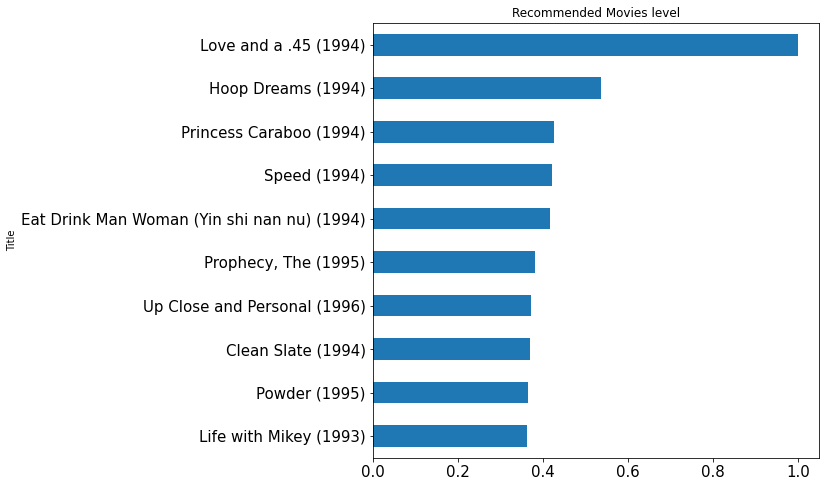

In [143]:
get_recommendations_knn(600)

# Part 2 
---
## Building a DNN model
* Sequencing the User ID's and Movie ID's

In [16]:
users = ratings_data.userId.unique()
movies = ratings_data.movieId.unique()

userid2idx = {o:i for i,o in enumerate(users)}
movieid2idx = {o:i for i,o in enumerate(movies)}

In [17]:
ratings_data['user'] = ratings_data['userId'].apply(lambda x: userid2idx[x])
ratings_data['movie'] = ratings_data['movieId'].apply(lambda x: movieid2idx[x])

* Adding the sequenced data to the ratings dataset

In [18]:
ratings_data

,userId,movieId,rating,user,movie
0,0,0,4.0,0,0
1,0,2,4.0,0,1
2,0,5,4.0,0,2
3,0,43,5.0,0,3
4,0,46,5.0,0,4
...,...,...,...,...,...
100831,609,9416,4.0,609,3120
100832,609,9443,5.0,609,2035
100833,609,9444,5.0,609,3121
100834,609,9445,5.0,609,1392


## Splitting the data for training and testing

In [19]:
split = np.random.rand(len(ratings_data)) < 0.9
train = ratings_data[split]
valid = ratings_data[~split]
print(train.shape , valid.shape)

(90730, 5) (10106, 5)


* We create the user and movie embeddings using the keras Embedding layer

In [20]:
embedding_factor = 64

* Setting the embedding size

In [21]:
user_input = Input(shape = (1,))
user_embedding = Embedding(num_users,embedding_factor)(user_input)
user_vec = Flatten()(user_embedding)
user_vec = Dropout(0.4)(user_vec)
movie_input = Input(shape = (1,))
movie_embedding=Embedding(num_movies,embedding_factor)(movie_input)
movie_vec = Flatten()(movie_embedding)
movie_vec = Dropout(0.4)(movie_vec)
similarity=dot([user_vec,movie_vec], axes=1)
#x = BatchNormalization()(similarity)
x = Dense(96,activation='relu')(similarity)
x = Dropout(0.4)(x)
x = Dense(1,activation='relu')(x)
model = Model([user_input, movie_input], x)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 64)        39040       input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 64)        622336      input_2[0][0]                    
_______________________________________________________________________________________

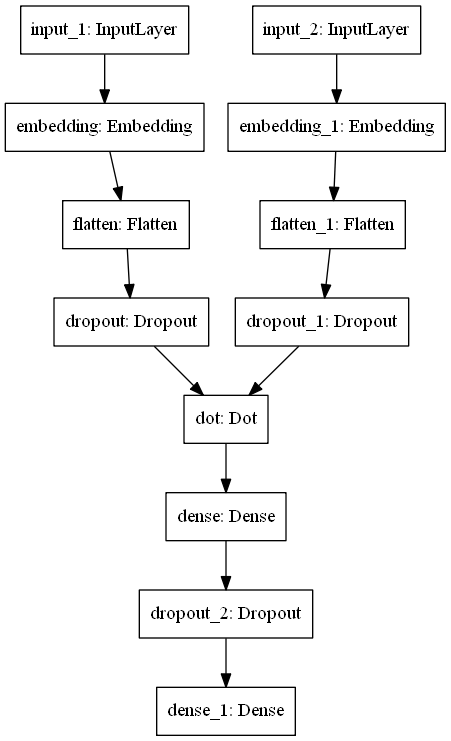

In [22]:
model.summary()
plot_model(model)

In [23]:
model.compile(optimizer=Adam(lr=1e-4),loss='mse')

In [24]:
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=10,verbose=0, mode='auto')
batch_size=128
epochs=100

### Training process
* Since we use the MSE as loss, we intend to reduce the loss.

In [25]:
History = model.fit([train.userId,train.movieId],train.rating, batch_size=batch_size,
                              epochs =epochs, validation_data = ([valid.userId,valid.movieId],valid.rating),
                              verbose = 1, callbacks = [early])

Epoch 1/100
709/709 [==============================] - 6s 9ms/step - loss: 10.9792 - val_loss: 8.1832
Epoch 2/100
709/709 [==============================] - 7s 9ms/step - loss: 5.2767 - val_loss: 2.9571
Epoch 3/100
709/709 [==============================] - 7s 9ms/step - loss: 1.9256 - val_loss: 1.2478
Epoch 4/100
709/709 [==============================] - 7s 9ms/step - loss: 1.2837 - val_loss: 1.0959
Epoch 5/100
709/709 [==============================] - 7s 9ms/step - loss: 1.2562 - val_loss: 1.0908
Epoch 6/100
709/709 [==============================] - 6s 9ms/step - loss: 1.2510 - val_loss: 1.0871
Epoch 7/100
709/709 [==============================] - 7s 9ms/step - loss: 1.2290 - val_loss: 1.0849
Epoch 8/100
709/709 [==============================] - 7s 10ms/step - loss: 1.1906 - val_loss: 1.0737
Epoch 9/100
709/709 [==============================] - 7s 9ms/step - loss: 1.1433 - val_loss: 1.0526
Epoch 10/100
709/709 [==============================] - 7s 10ms/step - loss: 1.0822 - val

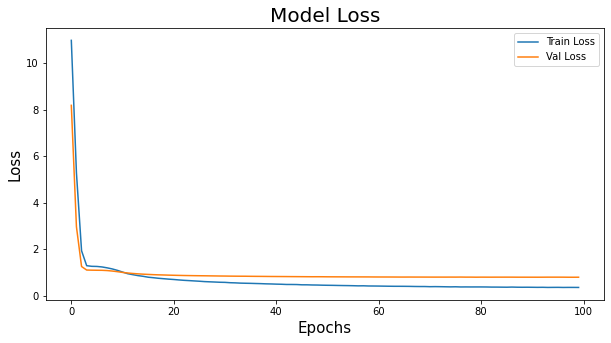

In [33]:
plt.figure(figsize=(10,5))
plt.plot(History.history['loss'],  label='Train Loss')
plt.plot(History.history['val_loss'], label='Val Loss')
plt.title('Model Loss', size = 20)
plt.ylabel('Loss', size = 15)
plt.xlabel('Epochs', size = 15)
plt.legend()
plt.show()

In [27]:
#test_user = ratings_data.userId.sample(1).iloc[0]
test_user = 600
watched = ratings_data[ratings_data.userId == test_user]
val = movies_data['movieId'].isin(watched.movieId.values)
not_watched = movies_data[~val]['movieId']
util_val =  set(not_watched).intersection(set(movieid2idx.keys()))
not_watched = list(util_val)
not_watched = [[movieid2idx.get(x)] for x in not_watched]
test_user = userid2idx.get(test_user)
test_user = np.asarray(test_user).astype(np.float32)
not_watched = np.asarray(not_watched).astype(np.float32)
test_user_arr = np.array([test_user for i in range(not_watched.shape[0])])
not_watched = not_watched.reshape(-1)

In [28]:
rat = model.predict([test_user_arr,not_watched])

In [29]:
top_rat = rat.argsort(axis=0)[-10:][::-1]

In [30]:
recommended_movie_ids = [movieid2idx.get(not_watched[x][0]) for x in top_rat]

In [31]:
print("Showing recommendations for user: {}".format(test_user))
print("====================================================")
print("Movies with high ratings from user")
print("====================================================")
top_movies_user = (watched.sort_values(by="rating", ascending=False).head(5).movieId.values)
movie_df_rows = movies_data[movies_data["movieId"].isin(top_movies_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ":\t", row.genres)

print("====================================================")
print("Top 10 movie recommendations")
print("====================================================")
recommended_movies = movies_data[movies_data["movieId"].isin(recommended_movie_ids)]
for row in recommended_movies.itertuples():
    print(row.title, ":\t", row.genres)

Showing recommendations for user: 600.0
Movies with high ratings from user
Kissed (1996) :	 Drama|Romance
Jackie Brown (1997) :	 Crime|Drama|Thriller
Lost Weekend, The (1945) :	 Drama
Thirteen (2003) :	 Drama
Top 10 movie recommendations
Eat Drink Man Woman (Yin shi nan nu) (1994) :	 Comedy|Drama|Romance
Jason's Lyric (1994) :	 Crime|Drama
Angels in the Outfield (1994) :	 Children|Comedy
Robin Hood: Prince of Thieves (1991) :	 Adventure|Drama
Citizen Ruth (1996) :	 Comedy|Drama
Blame It on Rio (1984) :	 Comedy|Romance


In [32]:
recommended_movies

,movieId,title,genres
198,232,Eat Drink Man Woman (Yin shi nan nu) (1994),Comedy|Drama|Romance
348,391,Jason's Lyric (1994),Crime|Drama
779,1021,Angels in the Outfield (1994),Children|Comedy
784,1027,Robin Hood: Prince of Thieves (1991),Adventure|Drama
1072,1392,Citizen Ruth (1996),Comedy|Drama
1678,2259,Blame It on Rio (1984),Comedy|Romance


## Result discussion

* From the tasks we can see a list of recomendations for the user 600
* Both the models recommended movies that belonged to a variety of genres from the users wated pattern. * The surprising thing is that only one recommendation of Nearest Neighbour based approach and deep learning based approach matched. 
* This can be attributed to the stochasticity of the model.